In [1]:
from qiskit import * 
from qiskit.visualization import * 

S_simulator=Aer.backends(name='statevector_simulator')[0]
M_simulator=Aer.backends(name='qasm_simulator')[0]

In [2]:
#I Fill a Quantum register with 2 qubits 
qregister=QuantumRegister(2)

#Define a quantum circuit 
#stuff in () are called arguments 
qcircuit=QuantumCircuit(qregister)

#draws a diagram 
qcircuit.draw()

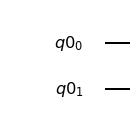

In [3]:
#draws a better diagram 
qcircuit.draw(output='mpl')

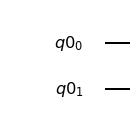

In [4]:
circuit_drawer(qcircuit, output='mpl')

In [5]:

#Python counts starting at 0
#.h on a circuit applies the haddamard gate 
#.x on a circuit applies the x gate and etc 
# qcircuit.x(0) # Applies the x gate on the 1st (zeroth) qubit
qcircuit.h(0)
qcircuit.h(1)
qcircuit.barrier()

In [6]:
#Without matplot lib
qcircuit.draw()


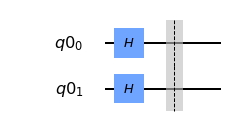

In [7]:
#with matplotlib
qcircuit.draw(output='mpl')

In [8]:
#Getting a statevector 
job=execute(qcircuit, S_simulator)
ket=job.result().get_statevector()
#print it out 
print(ket)
#python a+bj complex numbers 

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


In [9]:
new_circuit=QuantumCircuit(qregister)
new_circuit.initialize(ket, qregister)

new_job=execute(new_circuit, S_simulator)
new_ket=new_job.result().get_statevector()

print(new_ket)


[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


In [10]:
new_circuit.draw()

C:\Users\scien\Anaconda3\lib\site-packages\qiskit\visualization\tools\pi_check.py:51: ComplexWarning: Casting complex values to real discards the imaginary part
  inpt = float(inpt)


In [11]:
#make a classical register to measure stuff
cregister=ClassicalRegister(2)
#add classical register to qcircuit 
qcircuit.add_register(cregister)

#make measurements (measurement 'gates')
qcircuit.measure(qregister[0], cregister[0])

qcircuit.measure(qregister[1], cregister[1])

qcircuit.draw()

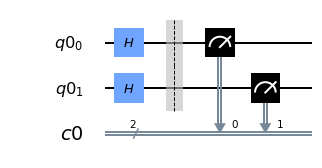

In [12]:
qcircuit.draw(output='mpl')

{'01': 1}


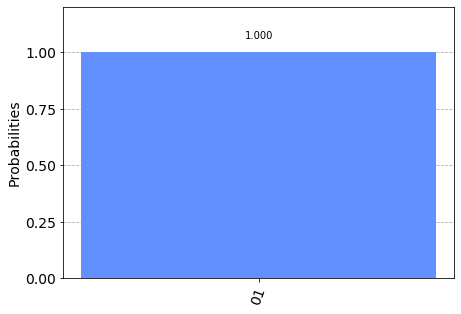

In [13]:
measurement=execute(qcircuit, M_simulator, shots=1)
result=measurement.result().get_counts()
#go to command line and type pip install matplotlib 
#For Lisa pip3 install matplotlib 
#prints states and counts 
print(result)
plot_histogram(result)

In [14]:

qr=QuantumRegister(3)
crz=ClassicalRegister(1)#holds measurement to tell us to use X gate on Bob's qubit 
crx=ClassicalRegister(1)#holds measurement to tell us to use Z gate on Bob's qubit 
teleportation_circuit=QuantumCircuit(qr, crz, crx)

teleportation_circuit.draw()

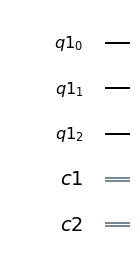

In [15]:
teleportation_circuit.draw(output='mpl') 

In [16]:
#STEP 5 COMEBACK HERE! 
#import a helpful package for math stuff including sqrt 
from math import * 


#define a state for a single qubit 
psi=[1/sqrt(2),1/sqrt(2)]

from qiskit.extensions import Initialize 

#qcircuit.initialize #This initialize circuits NOT states 

init_gate = Initialize(psi)

teleportation_circuit.append(init_gate, [0]) #use init gate on ALice's qubit to put it into that state. 

In [17]:
'''
Step 1 

Alice has the first qubit in some state psi 
Bob has the third qubit
Bob entangles his qubit with a the second qubit ancillary qubit to make the teleportation. 
'''

###Set up entanglement between Bob's and ancillary qubit 
teleportation_circuit.h(1)
#CNOT gate
teleportation_circuit.cx(1,2)
#Barriers are important between steps! 
teleportation_circuit.barrier()
teleportation_circuit.draw()

In [18]:
#STEP 2 

teleportation_circuit.cx(0,1) #Cnot between Alice and BOB
teleportation_circuit.h(0)
teleportation_circuit.barrier()

teleportation_circuit.draw()

In [19]:
#Step 3 

teleportation_circuit.measure(0,0)
teleportation_circuit.measure(1,1)

teleportation_circuit.barrier()

teleportation_circuit.draw()


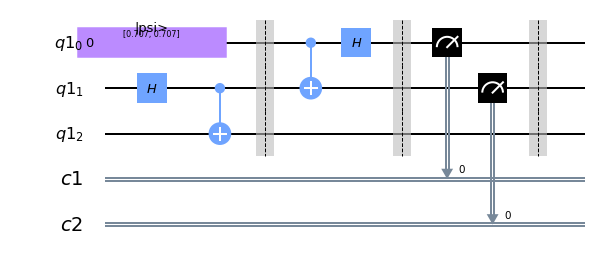

In [20]:
teleportation_circuit.draw(output='mpl')

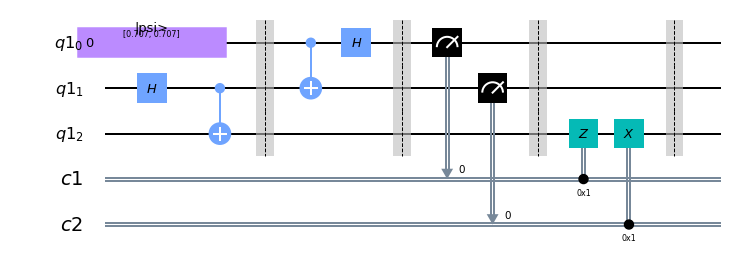

In [21]:
#STEP 4 

#apply z and x accordingly 
teleportation_circuit.z(2).c_if(crz, 1)
teleportation_circuit.x(2).c_if(crx, 1)

teleportation_circuit.barrier()

teleportation_circuit.draw(output='mpl')

In [22]:
teleportation_circuit.draw()

In [23]:
#STEP 5
#GOBACK TO BEFORE STEP 1


In [24]:
#Step 6 How do we check? 

inverse_init_gate=init_gate.gates_to_uncompute()

teleportation_circuit.append(inverse_init_gate, [2])

cresult=ClassicalRegister(1)

teleportation_circuit.add_register(cresult)

teleportation_circuit.measure(2, 2)

teleportation_circuit.draw()

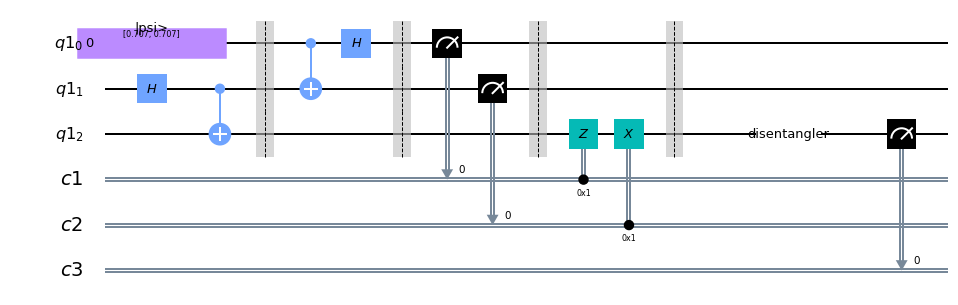

In [25]:
teleportation_circuit.draw(output='mpl')

{'0 0 0': 264, '0 0 1': 294, '0 1 0': 216, '0 1 1': 250}


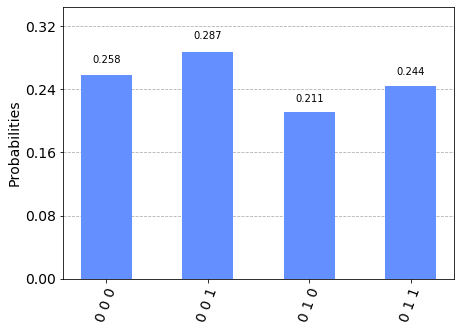

In [26]:
Bob=execute(teleportation_circuit, M_simulator)
Finally=Bob.result().get_counts()

print(Finally)

plot_histogram(Finally)